In [1]:
from load_modules import *


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
header = ['Cm', 'Ch', 'Bm', 'Bh', 'T', 'sR', 'sG', 'sB','L','A', 'B']
# Load data from CSV file
lut_path = r"C:\Users\joeli\OneDrive\Documents\GitHub\AutoEncoder_Integrated\data\LargeMCLUT.csv"
df = pd.read_csv(lut_path, names=header).astype(float)

# Compute covariance matrix
cov_matrix = np.cov(df.T)

# Label rows and columns
row_labels = ['Cm', 'Ch', 'Bm', 'Bh', 'T', 'sR', 'sG', 'sB']
col_labels = ['Cm', 'Ch', 'Bm', 'Bh', 'T', 'sR', 'sG', 'sB']
#round RGB values to 4 decimal places

df['sR'] = df['sR'].round(4)
df['sG'] = df['sG'].round(4)
df['sB'] = df['sB'].round(4)

# Create dataframe with labeled rows and columns
cov_df = pd.DataFrame(cov_matrix, index=row_labels, columns=col_labels)

# Print covariance matrix with row and column labels
print(cov_df)

# Plot correlation matrix
fig, ax = plt.subplots(figsize=(5, 5))
im = ax.imshow(cov_matrix, cmap='coolwarm')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set tick labels
ax.set_xticks(np.arange(len(col_labels)))
ax.set_yticks(np.arange(len(row_labels)))
ax.set_xticklabels(col_labels)
ax.set_yticklabels(row_labels)

# Rotate tick labels
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

# Add values to each cell
for i in range(len(row_labels)):
    for j in range(len(col_labels)):
        text = ax.text(j, i, round(cov_matrix[i, j], 2), ha='center', va='center', color='w')

# Show plot
plt.show()

# Compute descriptive statistics for each variable
stats = df.describe()

# Print descriptive statistics
print(stats)

# Compute sampling range based on standard deviation of each variable
sampling_range = stats.loc['mean'] + 2 * stats.loc['std']

# Print sampling range
print("Sampling range:")
print(sampling_range)

# Compute number of bins for each variable
num_bins = round(np.sqrt(len(df)))

# Print number of bins
print("Number of bins:")
print(num_bins)

# Create histogram for each variable as one figure
# Create histogram for each variable on a single plot
fig, axs = plt.subplots(2, 4, figsize=(10, 5))
axs = axs.ravel()
for i, col in enumerate(df.columns):
    axs[i].hist(df[col], bins=num_bins)
    axs[i].set_title(col)

# Show plot
plt.tight_layout()
#save the plot
plt.savefig(r'C:\Users\joeli\OneDrive\Documents\GitHub\AutoEncoder_Integrated\Results\txyz01\histograms.png', dpi=1000)
plt.show()

# Define x, y, and z values for the heatmap
x = row_labels
y = col_labels
z = cov_matrix

# Define the trace for the heatmap
trace = go.Heatmap(
    x=x,
    y=y,
    z=z,
    colorscale='Viridis'
)

# Define the layout for the plot
layout = go.Layout(
    title='Covariance Matrix',
    scene=dict(
        xaxis=dict(title='Variables'),
        yaxis=dict(title='Variables'),
        zaxis=dict(title='Covariance')
    )
)
#flip the y axis
layout['yaxis']['autorange'] = 'reversed'
# Create the plot
fig = go.Figure(data=[trace], layout=layout)

# Show the plot
fig.show()


ValueError: could not convert string to float: 'Cm'

In [15]:
#load data 

# with tf.device('/device:GPU:0'):
np.random.seed(42)
#load csv into 
# data_path = r"C:\Users\joeli\OneDrive\Documents\GitHub\EncoderDecoder\JJ_LUT.csv"
headers = "Cm,Ch,Bm,Bh,T,sR,sG,sB,L,A,B"

lut_path = r"C:\Users\joeli\OneDrive\Documents\GitHub\AutoEncoder_Integrated\data\LargeMCLUT.csv"
# lut_path = r"C:\Users\joeli\OneDrive\Documents\GitHub\AutoEncoder_Integrated\data\LAB_LUT_1.csv"
# lut_path = r"C:\Users\joeli\OneDrive\Documents\GitHub\AutoEncoder_Integrated\data\LUT_v8_LAB.csv"
# df = pd.read_csv(r"C:\Users\joeli\OneDrive\Documents\GitHub\ChatGptAE\JJ_LUT_v3.csv", sep=",", header=None, names=headers.split(","))
# df = pd.read_csv(r"C:\Users\joeli\OneDrive\Documents\GitHub\ChatGptAE\JJ_LUT_v4.csv", sep=",", header=None, names=headers.split(","))
df = pd.read_csv(lut_path, sep=",", header=None, names=headers.split(","))

data = df[['Cm','Ch','Bm','Bh','T','sR','sG','sB']]
print(df.head())
#remove header
df = df.iloc[1:]
#inputs = Cm,Ch,Bm,epi_thick
y = df[['Cm','Ch','Bm','Bh','T']]
print(y.head())

#outputs = sR,sG,sB
x = df[['sR','sG','sB']]
print(x.head())

df.head()
#remove headers and convert to numpy array
x = df[['sR','sG','sB']].iloc[1:].to_numpy().astype('float32')
y = df[['Cm','Ch','Bm','Bh','T']].iloc[1:].to_numpy()
#train nn on x,y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, shuffle=True)

#numpy arrays
x_train = np.asarray(x_train).reshape(-1,3).astype('float32')


x_test = np.asarray(x_test).reshape(-1,3).astype('float32')

print(f"bef norm x_train[0] {x_train[0]}")


#normalize
x_train = x_train/255.0
x_test = x_test/255.0
print(f"aft norm x_train[0] {x_train[0]}")
#normalize
# def norm_lab(x):
#     #L = 0,100 A = -50,50 B = -50,50
#     L = x[:,0]/100.0
#     A = (x[:,1]+50.0)/100.0
#     B = (x[:,2]+50.0)/100.0
#     return np.stack([L,A,B], axis=-1)

# def denorm_lab(x):
#     #L = 0,100 A = -50,50 B = -50,50
#     L = x[:,0]*100.0
#     A = (x[:,1]*100.0)-50.0
#     B = (x[:,2]*100.0)-50.0
#     return np.stack([L,A,B], axis=-1)
# x_train = norm_lab(x_train)
# x_test = norm_lab(x_test)
# print(f"aft norm x_train[0] {x_train[0]}")
# #xtrain, ytrain shapes
# print(f"x_train.shape {x_train.shape}")
# print(f"y_train.shape {y_train.shape}")
column_names = ['Cm', 'Ch', 'Bm', 'Bh', 'T', 'sR', 'sG', 'sB']
numeric_columns = []

# Check if columns exist and contain numeric data
for col in column_names:
    if col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            numeric_columns.append(col)
        else:
            print(f"Column '{col}' is not numeric.")
    else:
        print(f"Column '{col}' not found in DataFrame.")

if numeric_columns:
    # Select only the valid numeric columns
    selected_columns = df[numeric_columns]

    # Compute the covariance matrix
    covariance_matrix = selected_columns.cov(numeric_only=False)

    print(covariance_matrix)
else:
    print("No valid numeric columns found.")

      Cm     Ch  Bm   Bh           T                  sR                  sG  \
0     Cm     Ch  Bm   Bh           T                  sR                  sG   
1  0.002  0.003   0  0.6        0.01  248.53844477747955  209.31822875676676   
2  0.002  0.003   0  0.6  0.09333333  250.24644840983768   209.4626195184342   
3  0.002  0.003   0  0.6  0.17666667  251.92437711444458  212.54775959657653   
4  0.002  0.003   0  0.6        0.25  253.30481037457184   213.6918016547945   

                   sB                  L                   A  \
0                  sB                  L                   A   
1  182.16630182975683  86.59971479180528   9.808900108379925   
2   184.6526557084946  86.84103367017228  10.702429405769154   
3  186.25840383906603  87.77353518935449   9.938126102830347   
4  189.31202175921842  88.23818331897901  10.268361611090127   

                    B  
0                   B  
1  18.587377828940156  
2   17.63973129266445  
3   18.12235326786911  
4   17.1890857

TypeError: unsupported operand type(s) for /: 'tuple' and 'float'

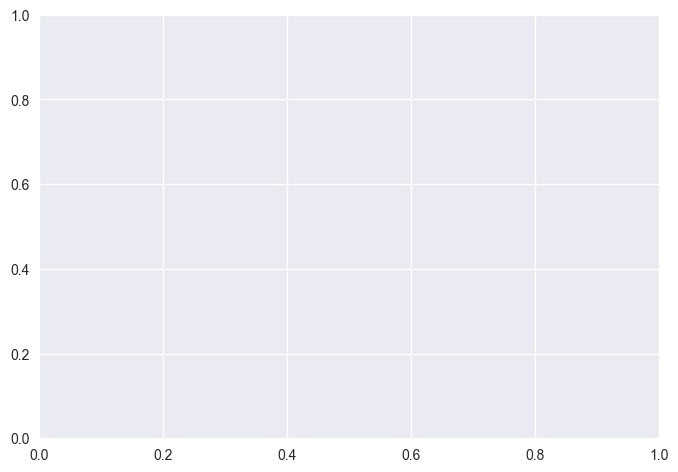

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the CSV LUT file
lut_df = pd.read_csv(r'C:\Users\joeli\OneDrive\Documents\GitHub\AutoEncoder_Integrated\data\LargeMCLUT.csv')
#round rgb  to 4 decimal places
lut_df['sR'] = lut_df['sR'].round(3)
lut_df['sG'] = lut_df['sG'].round(3)
lut_df['sB'] = lut_df['sB'].round(3)


# Count the number of pixels for each color and parameter combination
color_counts = {}
for _, row in lut_df.iterrows():
    color = tuple(row[:3])
    params = tuple(row[3:])
    if color not in color_counts:
        color_counts[color] = {}
    if params not in color_counts[color]:
        color_counts[color][params] = 0
    color_counts[color][params] += 1

# Sort the colors by count in descending order
sorted_colors = sorted(color_counts.keys(), key=lambda c: sum(color_counts[c].values()), reverse=True)
sorted_counts = [sum(color_counts[c].values()) for c in sorted_colors]

# Set up the bar chart
fig, ax = plt.subplots()
bar_width = 0.8

# Plot the bars for each color
bars = []
for index, color in enumerate(sorted_colors):
    count = sorted_counts[index]
    for params, param_count in color_counts[color].items():
        for i in range(param_count):
            rgb_color = tuple(row[:3].astype(int)) / 255.0
            bar = ax.bar(index, 1, bar_width, color=rgb_color)
            bars.append(bar)

# Set the x-axis labels to the color values
ax.set_xticks(range(len(sorted_colors)))
ax.set_xticklabels([str(color) for color in sorted_colors], rotation=90)

# Show the plot
plt.show()

In [8]:
import numpy as np
import pandas as pd
from multiprocessing import Pool

# Load the CSV LUT file
lut_df = pd.read_csv(r'C:\Users\joeli\OneDrive\Documents\GitHub\AutoEncoder_Integrated\data\MCLUT.csv')

# Define a tolerance value for color comparison
tolerance = 0.0001

# Define a function to round color values to a specified precision
def round_colors(precision):
    color_tuples = [tuple(np.round(np.array(row[:3]), precision)) for _, row in lut_df.iterrows()]
    unique_colors = set(color_tuples)
    if len(unique_colors) == len(lut_df):
        return precision
    return None

# Use multiprocessing to find the required decimal precision for color values
precision = 4
with Pool() as pool:
    while True:
        results = pool.map(round_colors, np.arange(precision, precision+1, 0.1))
        valid_results = [r for r in results if r is not None]
        if valid_results:
            break
        precision += 1

# Print the required decimal precision
print(f"Required decimal precision: {min(valid_results)}")


C:\Users\joeli\AppData\Local\Temp\ipykernel_38268\2188359521.py:1: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



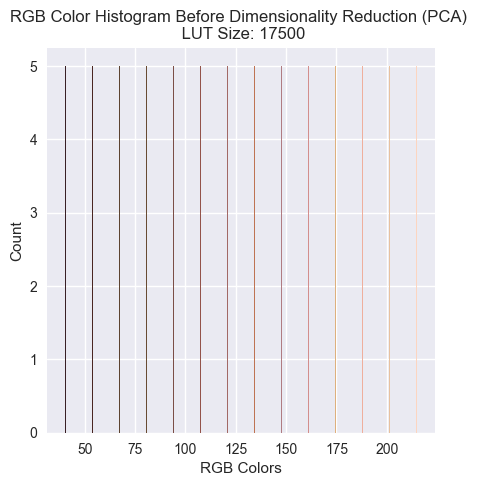

NameError: name 'headers' is not defined

In [15]:
plt.style.use('seaborn')

# Define the number of bins
num_bins = 20

# Calculate unique colors
unique_rgb_colors = unique_colors(df)

# Count occurrences of each unique color
color_counts = {color: 0 for color in unique_rgb_colors}
for color in unique_rgb_colors:
    color_counts[color] = sum((df['sR'] == color[0]) & (df['sG'] == color[1]) & (df['sB'] == color[2]))

# Create histogram
fig, ax = plt.subplots(figsize=(5, 5))

# Set width and positions of the bars
bar_width = 0.5
positions = np.linspace(0, 255, num_bins)

# Plot bars
bars = []
for index, (color, count) in enumerate(color_counts.items()):
    # Get the bin index for this color
    bin_index = int(np.round(np.mean(np.argmin(np.abs(positions - np.mean(color)), axis=0)), 0))
    # Plot the bar in the appropriate bin
    bar = ax.bar(positions[bin_index], count, bar_width, color=np.array(color)/255)
    bars.append(bar)

# Set labels and title
ax.set_xlabel('RGB Colors')
ax.set_ylabel('Count')
ax.set_title(f'RGB Color Histogram Before Dimensionality Reduction (PCA) \n LUT Size: {len(df)}')
plt.savefig('hist_before_pca.png', dpi=600)
plt.show()

# Load reduced data
reduced_path = r"C:\Users\joeli\OneDrive\Documents\GitHub\AutoEncoder_Integrated\important_combinations.csv"
df_reduced = pd.read_csv(reduced_path, sep=",", header=None, names=headers.split(","))
df_reduced = df_reduced.iloc[1:]

# Histogram of reduced data
# Calculate unique colors
unique_rgb_colors = unique_colors(df_reduced)

# Count occurrences of each unique color
color_counts = {color: 0 for color in unique_rgb_colors}
for color in unique_rgb_colors:
    color_counts[color] = sum((df_reduced['sR'] == color[0]) & (df_reduced['sG'] == color[1]) & (df_reduced['sB'] == color[2]))

# Create histogram
fig, ax = plt.subplots(figsize=(10, 10))
bar_width = 0.5
positions = np.arange(num_bins)
bars = []
for index, (color, count) in enumerate(color_counts.items()):
    # Get the bin index for this color
    bin_index = int(np.round(np.mean(np.argmin(np.abs(positions - np.mean(color)), axis=0)), 0))
    # Plot the bar in the appropriate bin
    bar = ax.bar(positions[bin_index], count, bar_width, color=np.array(color).astype('float32') / 255)
    bars.append(bar)
    # Remove x ticks
    ax.set_xticks([])

# Set labels and title
ax.set_xlabel('RGB Color Bins')
ax.set_ylabel('Count')
# Set the same scale as above
ax.set_ylim([0, 25])
ax.set_title(f'RGB Color Histogram After Dimensionality Reduction (PCA) \n LUT Size: {len(df_reduced)}')
plt.savefig('hist_after_pca.png', dpi=600)
plt.show()

In [4]:
import pandas as pd

# Convert the color counts to a DataFrame
color_counts_df = pd.DataFrame([(r, g, b, count) for (r, g, b), count in color_counts.items()],
                                columns=['sR', 'sG', 'sB', 'Count'])

# Sort the DataFrame by count, from most to least
sorted_color_counts_df = color_counts_df.sort_values(by='Count', ascending=False).reset_index(drop=True)

# Print the sorted DataFrame
print(sorted_color_counts_df)

# Save the sorted DataFrame to a CSV file
sorted_color_counts_df.to_csv('sorted_color_counts.csv', index=False)


      sR   sG   sB  Count
0     46   31   37     25
1     44   32   37     20
2     35   37   33     20
3     59   39   25     20
4     71   50   32     20
..   ...  ...  ...    ...
777  149  108  105      5
778  250  212  192      5
779   91   57   49      5
780  112   76   70      5
781  253  213  189      4

[782 rows x 4 columns]


In [8]:
# Add parameter columns to the color_counts_df
for col in ['Cm', 'Ch', 'Bm', 'Bh', 'T']:
    color_counts_df[col] = None

# Populate the parameter columns
for index, row in df.iterrows():
    color = tuple(row[['sR', 'sG', 'sB']])
    mask = (color_counts_df['sR'] == color[0]) & (color_counts_df['sG'] == color[1]) & (color_counts_df['sB'] == color[2])
    
    for col in ['Cm', 'Ch', 'Bm', 'Bh', 'T']:
        color_counts_df.loc[mask, col] = row[col]

# Sort the DataFrame by count, from most to least
sorted_color_counts_df = color_counts_df.sort_values(by='Count', ascending=False).reset_index(drop=True)

# Print the sorted DataFrame
print(sorted_color_counts_df)

# Save the sorted DataFrame to a CSV file
sorted_color_counts_df.to_csv('sorted_color_counts_with_parameters.csv', index=False)

       sR   sG   sB  Count     Cm     Ch    Bm   Bh     T
0      73   49   21      9  0.318  0.003  0.99  0.8  0.19
1      60   29   36      9    0.5   0.15  0.99  0.6  0.07
2      55   31   36      9    0.5   0.32   0.5  0.8  0.25
3      60   30   36      9    0.5   0.32   0.5  0.7  0.13
4      36   36   34      9    0.5  0.003  0.99  0.8  0.25
...   ...  ...  ...    ...    ...    ...   ...  ...   ...
1515  131   59   49      3  0.186   0.32  0.01  0.8  0.01
1516  148  104   92      3  0.042   0.15  0.99  0.8  0.25
1517  249  211  185      3  0.002  0.003  0.01  0.7  0.13
1518  239  194  169      3  0.013  0.003   0.5  0.6  0.01
1519  247  209  182      2  0.002  0.003  0.01  0.6  0.01

[1520 rows x 9 columns]


In [5]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming df is the original DataFrame with the data

# Remove the RGB columns to apply PCA to the parameters only
parameter_columns = ['Cm', 'Ch', 'Bm', 'Bh', 'T']
parameter_df = df[parameter_columns]

# Standardize the data
scaler = StandardScaler()
scaled_parameter_df = scaler.fit_transform(parameter_df)

# Apply PCA
pca = PCA(n_components=2)  # Select the number of components to retain
reduced_data = pca.fit_transform(scaled_parameter_df)

# Create a new DataFrame with the reduced data
reduced_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
reduced_df[['sR', 'sG', 'sB']] = df[['sR', 'sG', 'sB']]

# Print the reduced DataFrame
print(reduced_df)
reduced_df.to_csv('reduced_df.csv', index=False)

           PC1       PC2     sR     sG     sB
0    -0.387118 -0.029875    NaN    NaN    NaN
1    -1.143825 -0.524446  253.0  215.0  190.0
2    -1.522178 -0.771731  253.0  214.0  192.0
3    -1.900531 -1.019016  254.0  214.0  192.0
4    -0.009922  0.297527  253.0  214.0  192.0
...        ...       ...    ...    ...    ...
4369  1.962003  2.049664   35.0   37.0   33.0
4370  1.583649  1.802379   35.0   36.0   33.0
4371  0.826943  1.307808   34.0   36.0   33.0
4372  0.448590  1.060523   36.0   36.0   33.0
4373  0.070237  0.813237   34.0   36.0   33.0

[4374 rows x 5 columns]


In [6]:
import pandas as pd

# Assuming df is the original DataFrame with the data

# Calculate the variance of each parameter
parameter_columns = ['Cm', 'Ch', 'Bm', 'Bh', 'T']
variance = df[parameter_columns].var()

# Assign a score to each row based on the variance
df['score'] = df[parameter_columns].apply(lambda x: (x * variance).sum(), axis=1)

# Group the DataFrame by RGB values, find the row with the highest score in each group
idx = df.groupby(['sR', 'sG', 'sB'])['score'].idxmax()

# Keep only the rows with the highest scores within each color group
filtered_df = df.loc[idx].drop(columns='score')

# Print the filtered DataFrame
print(filtered_df)
filtered_df.to_csv('filtered_df.csv', index=False)

        Cm     Ch   Bm    Bh     T   sR   sG   sB          L          A  \
861  0.500  0.070  1.0  0.65  0.25   34   35   33  13.926869  -0.834239   
874  0.500  0.320  1.0  0.85  0.25   34   36   33  14.303311  -1.951976   
865  0.500  0.160  1.0  0.60  0.25   34   37   33  14.375931  -2.158716   
864  0.500  0.070  1.0  0.85  0.25   35   35   33  14.093700  -0.583076   
852  0.500  0.003  1.0  0.75  0.25   35   35   34  13.938606  -0.376702   
..     ...    ...  ...   ...   ...  ...  ...  ...        ...        ...   
352  0.002  0.003  0.5  0.75  0.25  253  212  189  87.845314  11.068124   
875  0.002  0.003  0.0  0.60  0.25  253  213  189  88.238183  10.268362   
4    0.002  0.003  0.0  0.85  0.25  253  214  192  88.538146  10.110318   
1    0.002  0.003  0.0  0.65  0.25  253  215  190  88.690115   9.484831   
3    0.002  0.003  0.0  0.80  0.25  254  214  192  88.633492  10.771087   

             B  
861   1.026211  
874   1.670836  
865   1.794802  
864   1.313185  
852   1.051072

In [12]:
df = pd.read_csv('filtered_df.csv')
# Add parameter columns to the color_counts_df
for col in ['Cm', 'Ch', 'Bm', 'Bh', 'T']:
    color_counts_df[col] = None

# Populate the parameter columns
for index, row in df.iterrows():
    color = tuple(row[['sR', 'sG', 'sB']])
    mask = (color_counts_df['sR'] == color[0]) & (color_counts_df['sG'] == color[1]) & (color_counts_df['sB'] == color[2])
    
    for col in ['Cm', 'Ch', 'Bm', 'Bh', 'T']:
        color_counts_df.loc[mask, col] = row[col]

# Sort the DataFrame by count, from most to least
sorted_color_counts_df = color_counts_df.sort_values(by='Count', ascending=False).reset_index(drop=True)

# Print the sorted DataFrame
print(sorted_color_counts_df)

# Save the sorted DataFrame to a CSV file
sorted_color_counts_df.to_csv('filtered_sorted_color_counts_with_parameters.csv', index=False)

       sR   sG   sB  Count     Cm     Ch    Bm   Bh     T
0      73   49   21      9  0.318  0.003  0.99  0.8  0.19
1      60   29   36      9    0.5   0.15  0.99  0.6  0.07
2      55   31   36      9    0.5   0.32   0.5  0.8  0.25
3      60   30   36      9    0.5   0.32   0.5  0.7  0.13
4      36   36   34      9    0.5  0.003  0.99  0.8  0.25
...   ...  ...  ...    ...    ...    ...   ...  ...   ...
1515  131   59   49      3  0.186   0.32  0.01  0.8  0.01
1516  148  104   92      3  0.042   0.15  0.99  0.8  0.25
1517  249  211  185      3  0.002  0.003  0.01  0.7  0.13
1518  239  194  169      3  0.013  0.003   0.5  0.6  0.01
1519  247  209  182      2  0.002  0.003  0.01  0.6  0.01

[1520 rows x 9 columns]


In [58]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data_path = r"C:\Users\joeli\OneDrive\Documents\GitHub\AutoEncoder_Integrated\data\MCLUT.csv"
headers = "Cm,Ch,Bm,Bh,T,sR,sG,sB,L,A,B"
df = pd.read_csv(data_path, sep=",", header=None, names=headers.split(","))

data = df.values
rgb_values = data[:, 5:8]
unique_rgb_values = np.unique(rgb_values, axis=0)

important_combinations = []

for unique_rgb in unique_rgb_values:
    matching_rows = (rgb_values == unique_rgb).all(axis=1)
    params = data[matching_rows, :5]
    lab_values = data[matching_rows, 8:]

    if params.shape[0] == 1:
        important_combinations.append(np.concatenate((params[0], unique_rgb, lab_values[0])))
        continue

    scaler = StandardScaler()
    scaled_params = scaler.fit_transform(params)

    if np.var(scaled_params) < 1e-10:
        important_combinations.append(np.concatenate((params[0], unique_rgb, lab_values[0])))
    else:
        pca = PCA(n_components=3)
        principal_components = pca.fit_transform(scaled_params)

        max_index = np.argmax(principal_components[:, 0])

        important_combination = np.concatenate((params[max_index], unique_rgb, lab_values[max_index]))
        important_combinations.append(important_combination)

important_combinations = np.array(important_combinations).astype(np.float32).round(3)
reduced_headers = "Cm,Ch,Bm,Bh,T,sR,sG,sB,L,A,B"
important_combinations = pd.DataFrame(important_combinations, columns=reduced_headers.split(","))
important_combinations.to_csv('important_combinations.csv', index=False, header=reduced_headers)


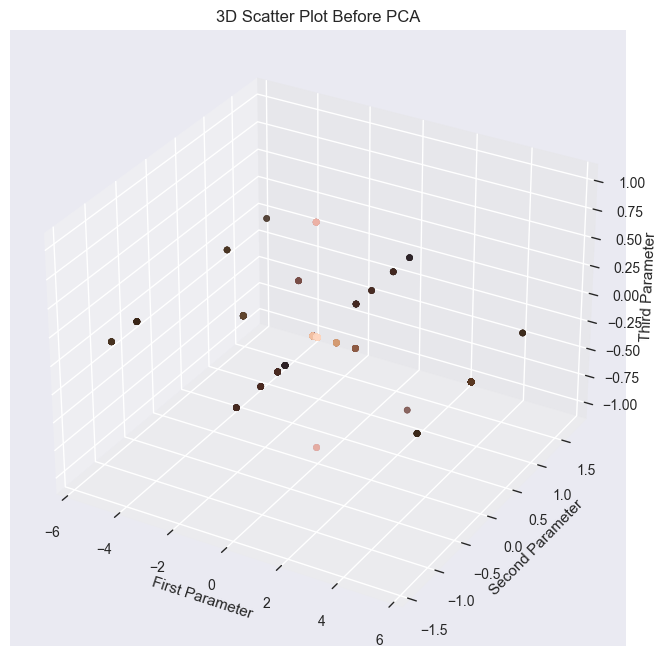

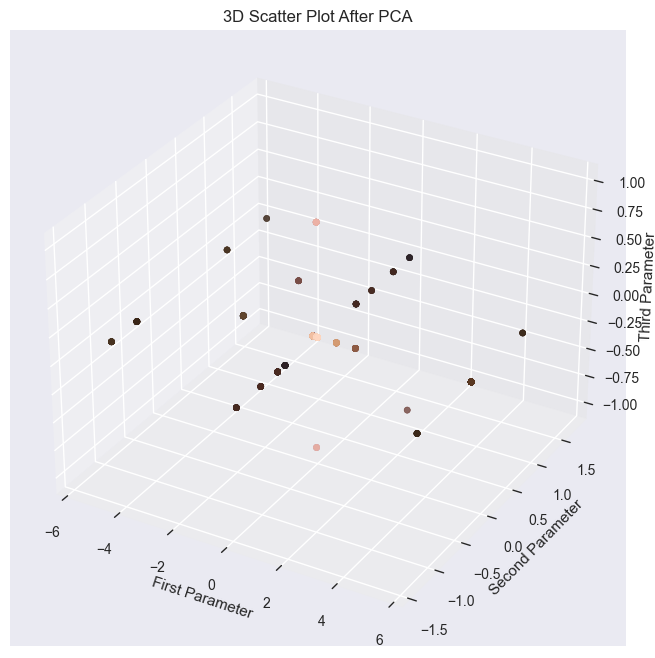

In [34]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Plot before PCA
fig_before = plt.figure(figsize=(12, 8))
ax_before = fig_before.add_subplot(111, projection='3d')

for unique_rgb in unique_rgb_values:
    matching_rows = (rgb_values == unique_rgb).all(axis=1)
    params = data[matching_rows, :-3]

    # Normalize the parameters
    scaler = StandardScaler()
    scaled_params = scaler.fit_transform(params)

    # Normalize the RGB values to the range [0, 1]
    rgb_normalized = unique_rgb / 255

    ax_before.scatter(scaled_params[:, 0], scaled_params[:, 1], scaled_params[:, 2], c=rgb_normalized[np.newaxis, :])

ax_before.set_xlabel('First Parameter')
ax_before.set_ylabel('Second Parameter')
ax_before.set_zlabel('Third Parameter')
ax_before.set_title('3D Scatter Plot Before PCA')
plt.savefig('scatter_plot_before_pca.png', dpi=400)
plt.show()
# Plot after PCA
fig_after = plt.figure(figsize=(12, 8))
ax_after = fig_after.add_subplot(111, projection='3d')

for unique_rgb in unique_rgb_values:
    # Get the parameter combinations for the current unique RGB value
    matching_rows = (rgb_values == unique_rgb).all(axis=1)
    params = data[matching_rows, :-3]

    # Normalize the parameters
    scaler = StandardScaler()
    scaled_params = scaler.fit_transform(params)
    
    # Normalize the RGB values to the range [0, 1]
    rgb_normalized = unique_rgb / 255

    ax_after.scatter(scaled_params[:, 0], scaled_params[:, 1], scaled_params[:, 2], c=rgb_normalized[np.newaxis, :])

ax_after.set_xlabel('First Parameter')
ax_after.set_ylabel('Second Parameter')
ax_after.set_zlabel('Third Parameter')
ax_after.set_title('3D Scatter Plot After PCA')
plt.savefig('scatter_plot_after_pca.png', dpi=400)



In [5]:
pca_2d = PCA(n_components=2)
principal_components_2d = pca_2d.fit_transform(scaled_params)

plt.figure(figsize=(8, 6))

for unique_rgb in unique_rgb_values:
    matching_rows = np.where((rgb_values == unique_rgb).all(axis=1))[0]
    points = principal_components_2d[matching_rows]
    rgb_normalized = unique_rgb / 255
    plt.scatter(points[:, 0], points[:, 1], c=rgb_normalized[np.newaxis, :])

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('2D Scatter Plot with Color-coded Points')
plt.show()


NameError: name 'PCA' is not defined

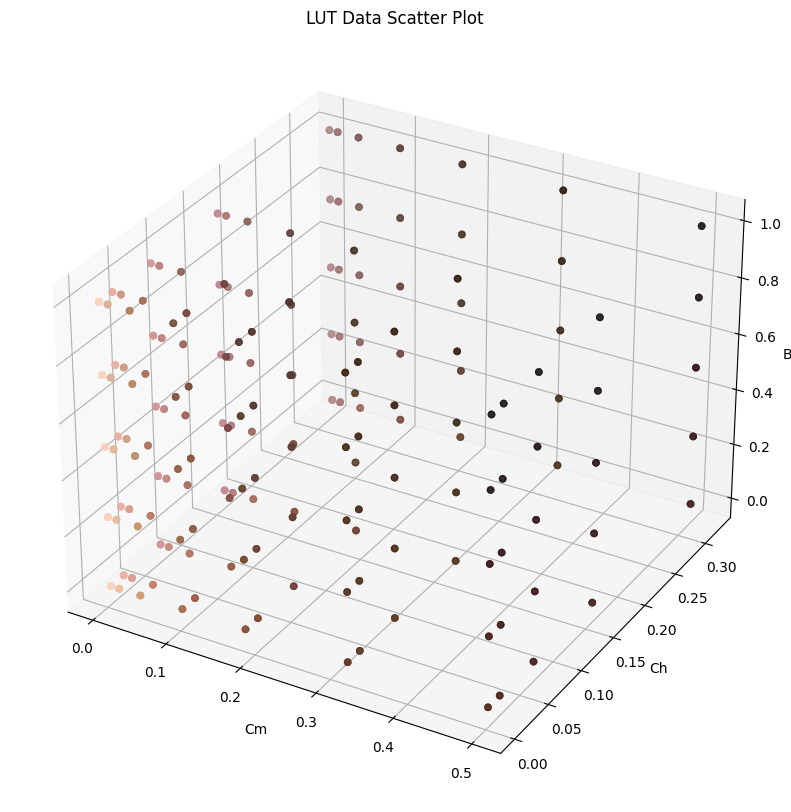

c:\Users\joeli\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\joeli\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.



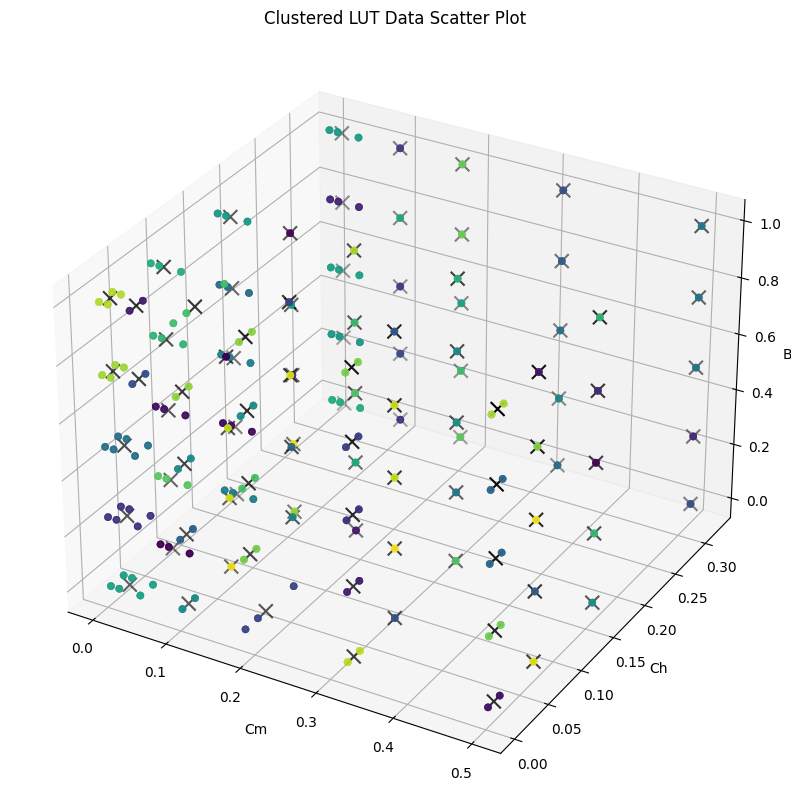

Recommended parameter ranges:
param_1: {'min': 0.007750000000000035, 'max': 0.5, 'step': 0.049225}
param_2: {'min': 0.011499999999999955, 'max': 0.32000000000000006, 'step': 0.03085000000000001}
param_3: {'min': 0.0, 'max': 1.0, 'step': 0.1}


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

# Load the LUT data
lut_path = r'C:\Users\joeli\OneDrive\Documents\GitHub\AutoEncoder_Integrated\data\MCLUT.csv'
df = pd.read_csv(lut_path)

# Create a scatter plot of the LUT data
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Cm'], df['Ch'], df['Bm'], c=df[['sR', 'sG', 'sB']].values / 255.0, alpha=0.1)
ax.set_xlabel('Cm')
ax.set_ylabel('Ch')
ax.set_zlabel('Bm')
ax.set_title('LUT Data Scatter Plot')
plt.show()

# Perform clustering analysis on the LUT data
features = df[['Cm', 'Ch', 'Bm']].values
kmeans = KMeans(n_clusters=100, random_state=0).fit(features)
cluster_centers = kmeans.cluster_centers_

# Create a scatter plot of the clustered data
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(features[:, 0], features[:, 1], features[:, 2], c=kmeans.labels_.astype(float), alpha=0.1)
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], cluster_centers[:, 2], marker='x', c='black', s=100)
ax.set_xlabel('Cm')
ax.set_ylabel('Ch')
ax.set_zlabel('Bm')
ax.set_title('Clustered LUT Data Scatter Plot')
plt.show()

# Determine the range and step size for each parameter based on the clustered data
param_ranges = {}
for i in range(features.shape[1]):
    min_val = np.min(cluster_centers[:, i])
    max_val = np.max(cluster_centers[:, i])
    step_size = (max_val - min_val) / 10
    param_ranges[f'param_{i+1}'] = {'min': min_val, 'max': max_val, 'step': step_size}

# Print the recommended parameter ranges
print('Recommended parameter ranges:')
for key, value in param_ranges.items():
    print(f'{key}: {value}')

import numpy as np

# Define the recommended parameter ranges
param_1 = {'min': 0.007750000000000035, 'max': 0.5, 'step': 0.049225}
param_2 = {'min': 0.011499999999999969, 'max': 0.32000000000000006, 'step': 0.03085000000000001}
param_3 = {'min': 0.0, 'max': 1.0, 'step': 0.1}

# Generate the arrays for each parameter
array_1 = np.arange(param_1['min'], param_1['max'], param_1['step'])
array_2 = np.arange(param_2['min'], param_2['max'], param_2['step'])
array_3 = np.arange(param_3['min'], param_3['max'], param_3['step'])

In [63]:
import numpy as np

# Define the recommended parameter ranges
param_1 = {'min': 0.007750000000000035, 'max': 0.5, 'step': 0.049225}
param_2 = {'min': 0.011499999999999969, 'max': 0.32000000000000006, 'step': 0.03085000000000001}
param_3 = {'min': 0.0, 'max': 1.0, 'step': 0.1}

# Generate the arrays for each parameter
array_1 = np.arange(param_1['min'], param_1['max'], param_1['step'])
array_2 = np.arange(param_2['min'], param_2['max'], param_2['step'])
array_3 = np.arange(param_3['min'], param_3['max'], param_3['step'])


print(array_1)
print(array_2)
print(array_3)


[0.00775  0.056975 0.1062   0.155425 0.20465  0.253875 0.3031   0.352325
 0.40155  0.450775]
[0.0115  0.04235 0.0732  0.10405 0.1349  0.16575 0.1966  0.22745 0.2583
 0.28915]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


In [65]:
import pandas as pd
import numpy as np
from pyDOE import lhs

# Define the recommended parameter ranges
param_ranges = {
    'Cm': {'min': 0.007750000000000035, 'max': 0.5, 'step': 0.049225},
    'Ch': {'min': 0.011499999999999969, 'max': 0.32000000000000006, 'step': 0.03085000000000001},
    'Bm': {'min': 0.0, 'max': 1.0, 'step': 0.1},
    # add other parameters here
}

# Generate a Latin hypercube sample
num_samples = 1000
lhs_samples = lhs(len(param_ranges), samples=num_samples, criterion='maximin')

# Scale the Latin hypercube sample to the recommended parameter ranges
for i, param_name in enumerate(param_ranges.keys()):
    min_val = param_ranges[param_name]['min']
    max_val = param_ranges[param_name]['max']
    step_size = param_ranges[param_name]['step']
    lhs_samples[:, i] = min_val + lhs_samples[:, i] * (max_val - min_val)
    lhs_samples[:, i] = np.round(lhs_samples[:, i] / step_size) * step_size

# Create a DataFrame of the LHS samples
lhs_df = pd.DataFrame(lhs_samples, columns=param_ranges.keys())

# Save the LHS samples to a CSV file
lhs_df.to_csv('lhs_samples.csv', index=False)



In [66]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load the LUT data
lut_path = r'C:\Users\joeli\OneDrive\Documents\GitHub\AutoEncoder_Integrated\data\MCLUT.csv'
df = pd.read_csv(lut_path)

# Perform PCA on the LUT data
pca = PCA(n_components=3)
pca.fit(df[['Cm', 'Ch', 'Bm']])
pca_components = pca.transform(df[['Cm', 'Ch', 'Bm']])

# Perform KMeans clustering on the PCA components
kmeans = KMeans(n_clusters=100, random_state=0).fit(pca_components)
cluster_centers = kmeans.cluster_centers_

# Create a new set of parameter arrays
param_arrays = []
for i in range(10):
    cm_vals = np.linspace(0.01, 1, 100)
    ch_vals = np.random.uniform(0.011499999999999969, 0.32000000000000006, 100)
    bm_vals = np.random.uniform(0, 1, 100)
    for cm in cm_vals:
        for ch, bm in zip(ch_vals, bm_vals):
            param_arrays.append([cm, ch, bm])

# Project the new set of parameter arrays onto the PCA space
new_pca_components = pca.transform(param_arrays)

# Assign each parameter array to a cluster center
labels = kmeans.predict(new_pca_components)

# Print the recommended parameter ranges for Cm
print('Recommended parameter ranges for Cm:')
for i in range(100):
    cluster_indices = np.where(labels == i)[0]
    cm_min = np.min([param_arrays[j][0] for j in cluster_indices])
    cm_max = np.max([param_arrays[j][0] for j in cluster_indices])
    cm_step = (cm_max - cm_min) / 10
    print(f'Cluster {i}: {cm_min:.3f} to {cm_max:.3f} with step {cm_step:.3f}')


c:\Users\joeli\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\joeli\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(


Recommended parameter ranges for Cm:
Cluster 0: 0.060 to 0.140 with step 0.008
Cluster 1: 0.060 to 0.140 with step 0.008
Cluster 2: 0.260 to 0.410 with step 0.015
Cluster 3: 0.410 to 1.000 with step 0.059
Cluster 4: 0.010 to 0.050 with step 0.004
Cluster 5: 0.060 to 0.140 with step 0.008
Cluster 6: 0.060 to 0.140 with step 0.008
Cluster 7: 0.410 to 1.000 with step 0.059
Cluster 8: 0.010 to 0.050 with step 0.004
Cluster 9: 0.260 to 0.410 with step 0.015
Cluster 10: 0.260 to 0.410 with step 0.015
Cluster 11: 0.150 to 0.250 with step 0.010
Cluster 12: 0.010 to 0.050 with step 0.004
Cluster 13: 0.410 to 1.000 with step 0.059
Cluster 14: 0.010 to 0.050 with step 0.004
Cluster 15: 0.260 to 0.410 with step 0.015
Cluster 16: 0.410 to 1.000 with step 0.059
Cluster 17: 0.150 to 0.250 with step 0.010
Cluster 18: 0.010 to 0.050 with step 0.004
Cluster 19: 0.010 to 0.050 with step 0.004
Cluster 20: 0.410 to 1.000 with step 0.059
Cluster 21: 0.260 to 0.410 with step 0.015
Cluster 22: 0.410 to 1.000 

c:\Users\joeli\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [68]:
from sklearn.model_selection import StratifiedShuffleSplit
# Load the LUT data
lut_path = r'C:\Users\joeli\OneDrive\Documents\GitHub\AutoEncoder_Integrated\data\MCLUT.csv'
df = pd.read_csv(lut_path)

# Perform clustering analysis on the LUT data
features = df[['Cm', 'Ch', 'Bm']].values
kmeans = KMeans(n_clusters=100, random_state=0).fit(features)
df['cluster'] = kmeans.labels_

# Divide the data into subgroups based on cluster assignment
n_subgroups = 10
subgroup_size = len(df) // n_subgroups
df['subgroup'] = (df['cluster'] * n_subgroups // 100).astype(int)

# Create a stratified sampling splitter
sss = StratifiedShuffleSplit(n_splits=1, test_size=subgroup_size, random_state=0)

# Sample randomly from each subgroup
indices = []
for _, test_index in sss.split(df, df['subgroup']):
    indices.append(test_index)

sampled_df = df.iloc[sorted([i for sublist in indices for i in sublist])]

# Verify that each RGB value is represented equally across subgroups
print(sampled_df.groupby(['cluster', 'subgroup']).size())

c:\Users\joeli\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\joeli\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(


cluster  subgroup
0        0           3
1        0           6
2        0           4
3        0           2
4        0           6
                    ..
95       9           3
96       9           3
97       9           4
98       9           1
99       9           2
Length: 96, dtype: int64
